In [88]:
from bs4 import BeautifulSoup
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)

import numpy as np
import datetime as dt #datetime for timeseries support
import matplotlib

In [75]:
df = pd.read_csv('LP_destinations.csv',encoding='latin1')

In [76]:
df

,Unnamed: 0,city,country,description
0,0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...,...
71,71,Venice,Italy,Imagine the audacity of building a city of mar...
72,72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


In [77]:
df["num_of_words"]=df['description'].apply(lambda x:len(str(x).split(" ")))
df["No_punct_description"]=df['description'].str.replace(r'[^\w\s]+','')
df["has_restaurants"]=df['description'].str.count("restaurant")
df["has_museums"]=df['description'].str.count("museum")
df["has_beaches"]=df['description'].str.count("beach")+df['description'].str.count("ocean")+df['description'].str.count("sea")


In [78]:
df

,Unnamed: 0,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,1,1
1,1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0,2
2,2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0,2
3,3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1,0,0
4,4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1,2,7
...,...,...,...,...,...,...,...,...,...
71,71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...,0,0,2
72,72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...,1,3,0
73,73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,1,2,1
74,74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0,0,0


In [79]:
df['num_of_words'].mean()

272.5131578947368

##city longest description

In [80]:
# max1=df['num_of_words'].max()
# index_max=df['num_of_words'].idxmax()
# print(df['num_of_words'][index_max])

df['city'][df['num_of_words'].idxmax()]


'Florence'

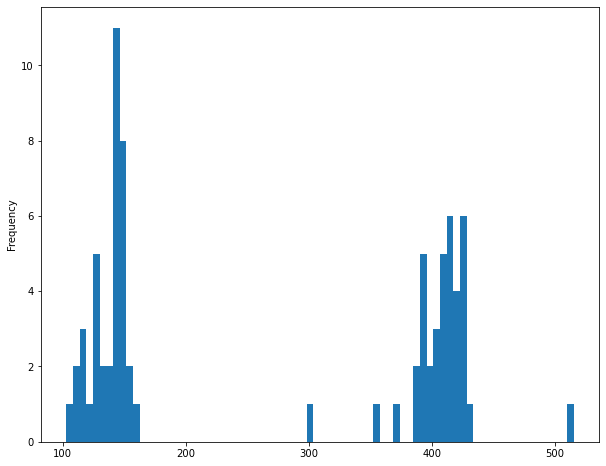

In [87]:

#df['num_of_words'].plot.hist(figsize=(10,8))
df['num_of_words'].plot.hist(figsize=(10,8),bins=len(df))

Text(0, 0.5, 'beaches')

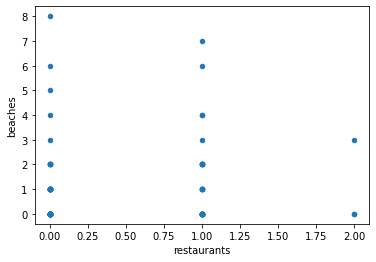

In [101]:
a=df.plot.scatter(x="has_restaurants",y="has_beaches")
a.set_xlabel("restaurants")
a.set_ylabel("beaches")


Text(0, 0.5, 'beaches')

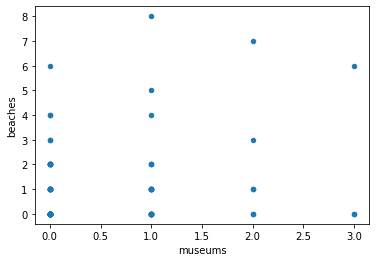

In [102]:
b=df.plot.scatter(x="has_museums",y="has_beaches")
b.set_xlabel("museums")
b.set_ylabel("beaches")